<a href="https://colab.research.google.com/github/slickHnaa/Career_Accelerator_LP3-Classifcation/blob/main/05_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Questions**

Do senior citizens have a higher churn rate than others?

Do customers with dependents have higher church rates?

Does age and gender contribute to the churn rate?

Is there a relationship between tunure and churn rate?

Does the contract term affect the churn rate?

Does number of services signed on to affect churn rate?

# **Hypothesis**

Does contract term affects attrition ?


**Null Hypothesis**

The contract tern does not affect attrition 


**Alternate hypothesis**

The contract term affects attrition

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#relevant ML libraries
from imblearn.over_sampling import ADASYN
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
import sklearn.metrics as metrics
from sklearn.neighbors import LocalOutlierFactor



#ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier

warnings.filterwarnings('ignore')

In [ ]:
c_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LP3/Telco-Customer-Churn.csv')
c_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#  Exploratory Data Analysis

## Data Cleaning

In [ ]:
c_data.shape

(7043, 21)

In [ ]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The total charges columns has a data type of an object instead of a float. This must be converted.

In [ ]:
c_data['TotalCharges'] = pd.to_numeric(c_data['TotalCharges'], errors='coerce')

In [ ]:
c_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
c_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are 11 missing values in the Total Charge column which is very insignificant compared with the total number of entries. Therefore these missing values will be dropped

In [ ]:
# Removing missing values
c_data.dropna(inplace=True)

In [ ]:
c_data.duplicated().sum()

0

There is no duplicated elements in the dataset

In [ ]:
c_data.shape

(7032, 21)

The ID column as no use and will be removed

In [ ]:
#removing ID column
c_data = c_data.iloc[:,1:]

In [ ]:
for column in c_data.columns:
  print(column, ':', c_data[column].nunique())


gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 72
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1584
TotalCharges : 6530
Churn : 2


In [ ]:
LE = preprocessing.LabelEncoder()
c_data['Churn'] = LE.fit_transform(c_data['Churn'])
c_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Univariate and Bivariate Analysis

## Univariate Analysis

In [ ]:
c_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80
Churn,7032.0,0.265785,0.441782,0.00,0.0000,0.000,1.0000,1.00


## **What is the distribution of Billing?**
Billing include the following headings
- Tenure
- Contract
- Paperles Billing
- Payment Method
- Monthly Charge
- Total Charge

#### Monthly Charges



[Text(0.5, 1.0, 'distribution of Monthly Charges')]

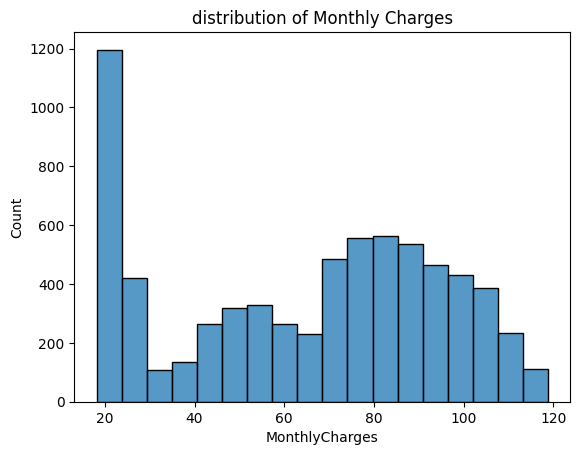

In [ ]:
sns.histplot(x = 'MonthlyCharges', data = c_data).set(title = 'distribution of Monthly Charges')

#### Most customers are charged \$20. Generally, the distribution of monthly charges is skewed to the right. Apart from \$20, most customers are charged between \$40 to \$110.

#### Tenure

[Text(0.5, 1.0, 'Tunure Across Board')]

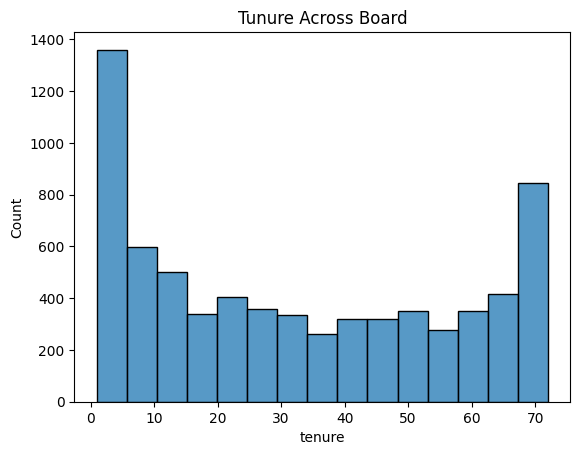

In [ ]:
sns.histplot(x = 'tenure', data = c_data).set(title = 'Tunure Across Board')

A lot of new customers sign up for the services and stay generally for 74 months.

#### Paperless Billing

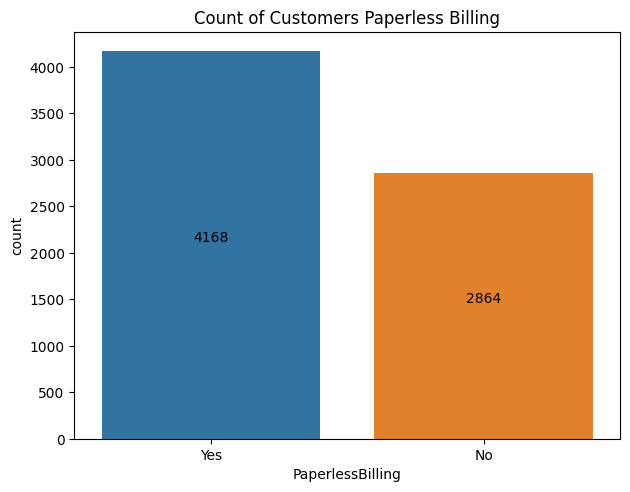

In [ ]:
ax = sns.countplot(x='PaperlessBilling',data=c_data)
vc = c_data['PaperlessBilling'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers Paperless Billing')
plt.show()

#### Payment Method

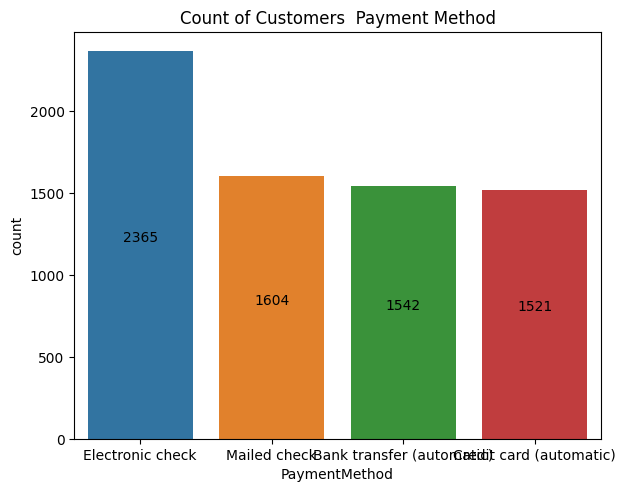

In [ ]:
ax = sns.countplot(x='PaymentMethod',data=c_data)
vc = c_data['PaymentMethod'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers  Payment Method')
plt.show()

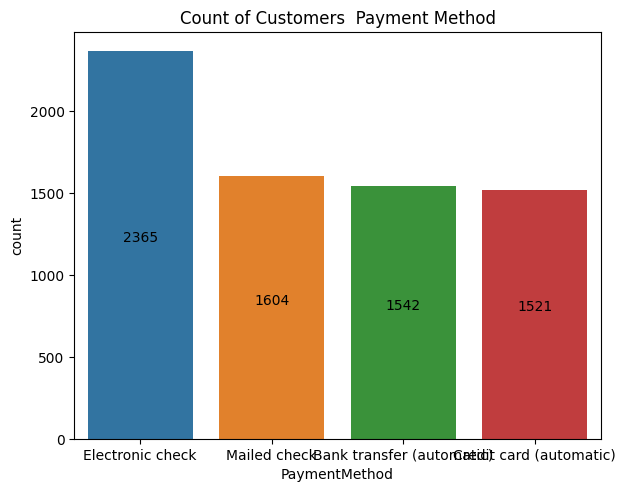

In [ ]:
ax = sns.countplot(x='PaymentMethod',data=c_data)
vc = c_data['PaymentMethod'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers  Payment Method')
plt.show()

#### Distribution of Monthly Charges

[Text(0.5, 1.0, 'Distribution of Monthly Charges')]

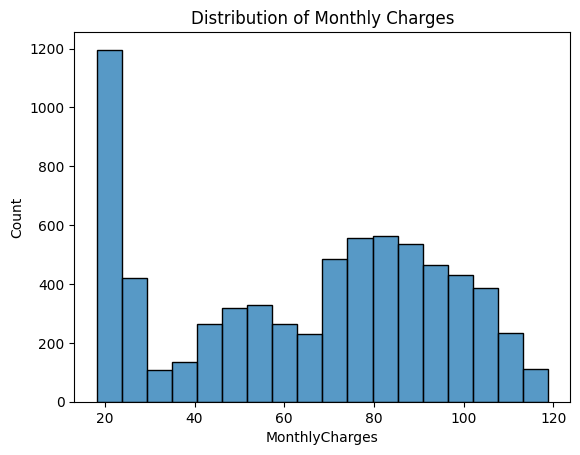

In [ ]:
sns.histplot(x = 'MonthlyCharges', data = c_data).set(title = 'Distribution of Monthly Charges')

[Text(0.5, 1.0, 'Distribution of Total Charges')]

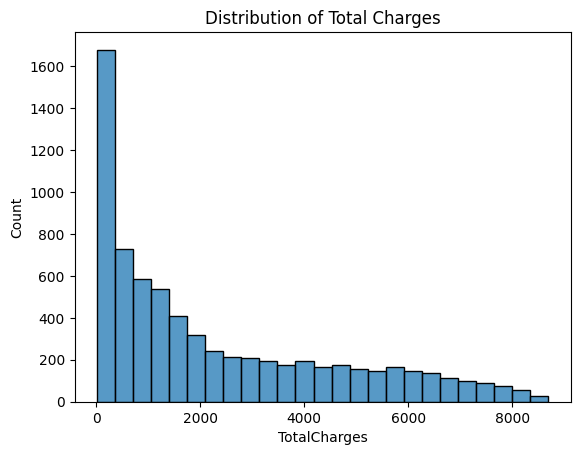

In [ ]:
sns.histplot(x = 'TotalCharges', data = c_data).set(title = 'Distribution of Total Charges')


#### Count of Customers  Contract

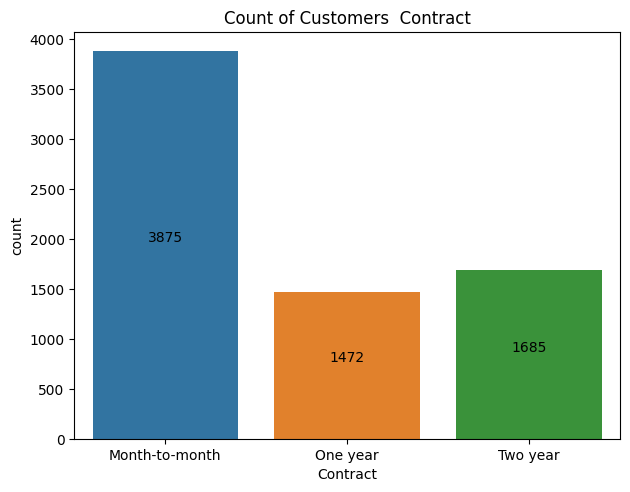

In [ ]:
ax = sns.countplot(x='Contract',data=c_data)
vc = c_data['Contract'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers  Contract')
plt.show()

### Que 2: What kinds of people are? What is the distribution of people? 
People include
-  Gender
- Customers with/without partners
- Customers with/without dependants
- Customers who are senior citizen or not
- Customers who churn or did not churn

#### Count of Gender

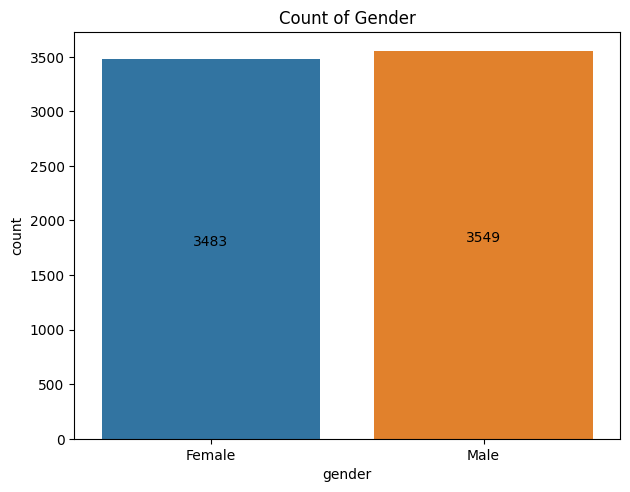

In [ ]:
ax = sns.countplot(x='gender',data=c_data)
vc = c_data['gender'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Gender')
plt.show()

The dataset contains 3488 females and 3555 males

#### Count of Customers with Partner

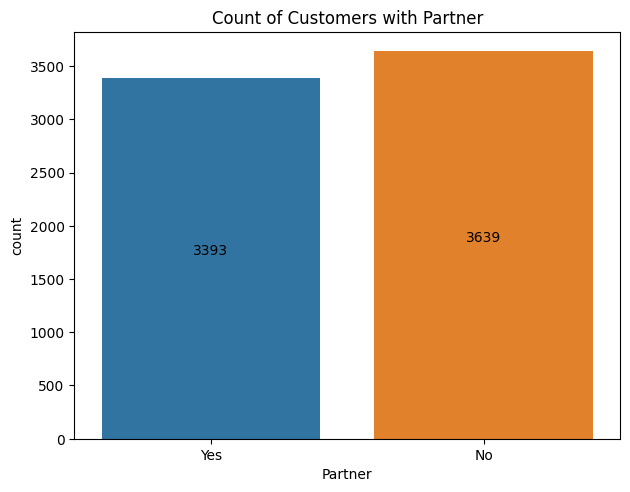

In [ ]:
ax = sns.countplot(x='Partner',data=c_data)
vc = c_data['Partner'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers with Partner')
plt.show()

The difference between customers with partners and those without partner is 243 which is approximately 3.45% of all customers

#### Count of Customers with Dependents

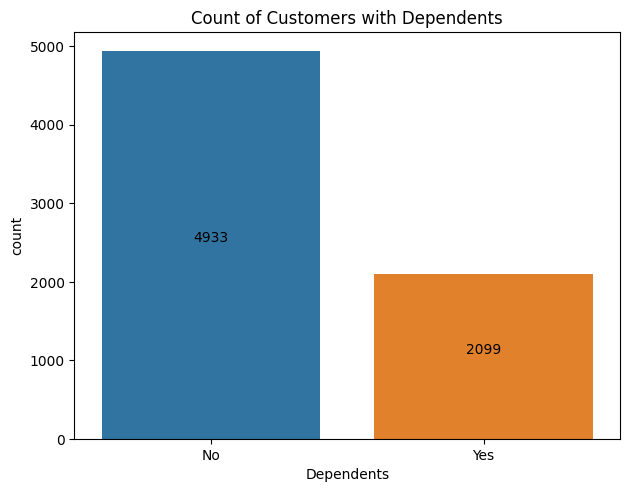

In [ ]:
ax = sns.countplot(x='Dependents',data=c_data)
vc = c_data['Dependents'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customers with Dependents')
plt.show()

About 4933 customer do not have dependents whiles 2110 have dependents 

#### Count of Senior Citizen


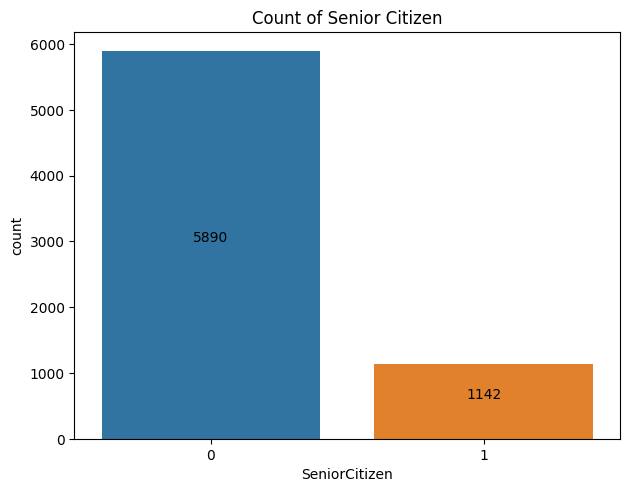

In [ ]:
ax = sns.countplot(x='SeniorCitizen', data=c_data)
vc = c_data['SeniorCitizen'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Senior Citizen')
plt.show()

There are 5901 non senior citizen and 1142 are senior citizen.

#### Count of Customer who Churn or not

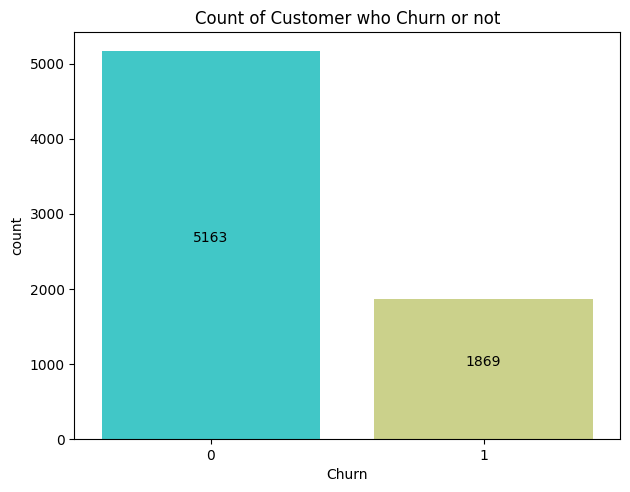

In [ ]:
ax = sns.countplot(x='Churn',data=c_data, palette='rainbow')
vc = c_data['Churn'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Count of Customer who Churn or not')
plt.show()

5174 customers did not churn whiles 1869 churn. This makes target variable inblances

## Bivariate Analysis

### Gender vs Tenure vs MonthlyCharges

[Text(0.5, 1.0, 'distribution of Monthly Charges')]

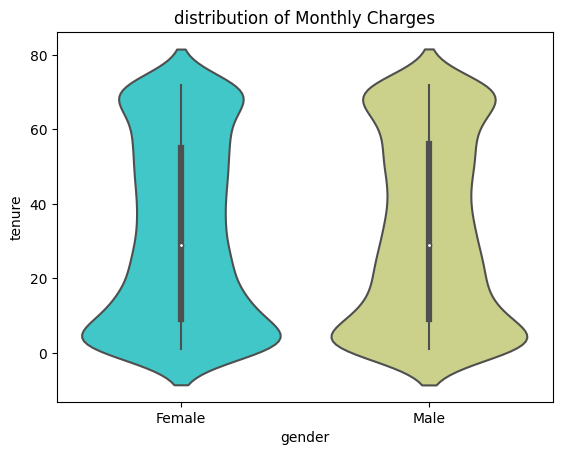

In [ ]:
sns.violinplot(x='gender',y='tenure',data=c_data,palette='rainbow').set(title = 'distribution of Monthly Charges')


Both genders spend the same amount of time on the network. This is seen through the distribution of gender and tenure

[Text(0.5, 1.0, 'distribution of Monthly Charges and gender of customers')]

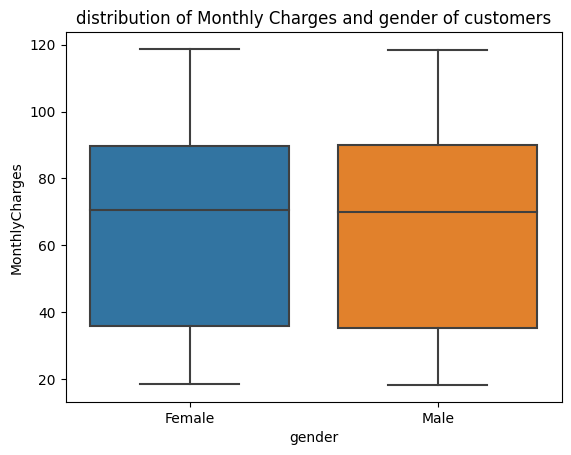

In [ ]:
sns.boxplot(x='gender',y='MonthlyCharges',data=c_data).set(title = 'distribution of Monthly Charges and gender of customers')

The distribution of gender base on their monthly chargers are the same for both male and female

### Dependents vs Tenure

[Text(0.5, 1.0, 'distribution of Monthly Charges and Customers with dependants')]

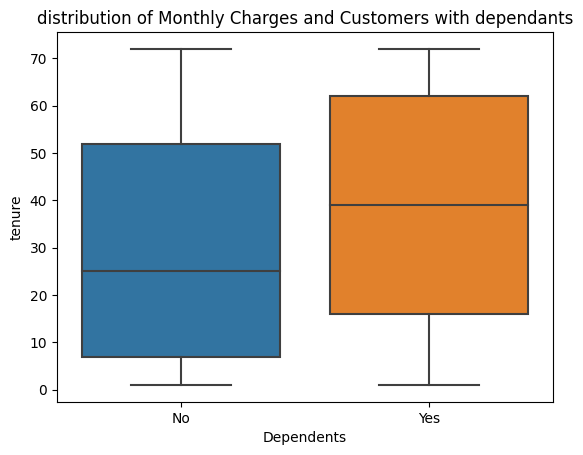

In [ ]:
sns.boxplot(x='Dependents',y='tenure',data=c_data).set(title = 'distribution of Monthly Charges and Customers with dependants')


### Dependents vs MonthlyCharges

[Text(0.5, 1.0, 'distribution of Monthly Charges and Customers with dependants')]

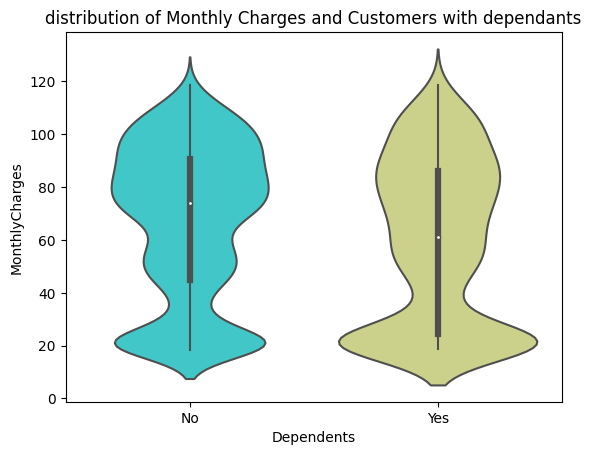

In [ ]:
sns.violinplot(x='Dependents',y='MonthlyCharges',data=c_data, palette='rainbow').set(title = 'distribution of Monthly Charges and Customers with dependants')


### Churn vs tenure

[Text(0.5, 1.0, 'distribution of Monthly Charges and Customer Churning')]

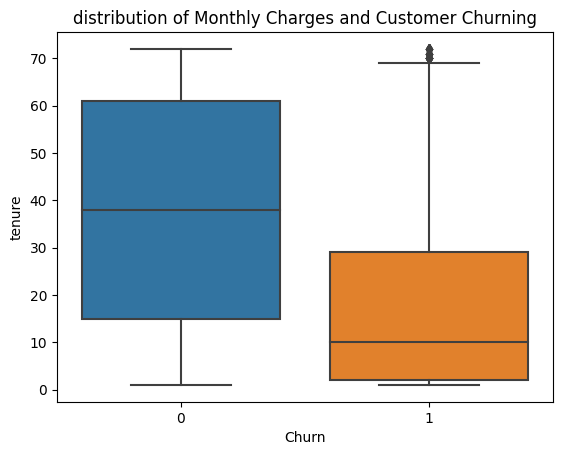

In [ ]:
sns.boxplot(x='Churn',y='tenure', data=c_data).set(title = 'distribution of Monthly Charges and Customer Churning')


### Churn vs MonthlyCharges

[Text(0.5, 1.0, 'distribution of Monthly Charges and Customer Churning')]

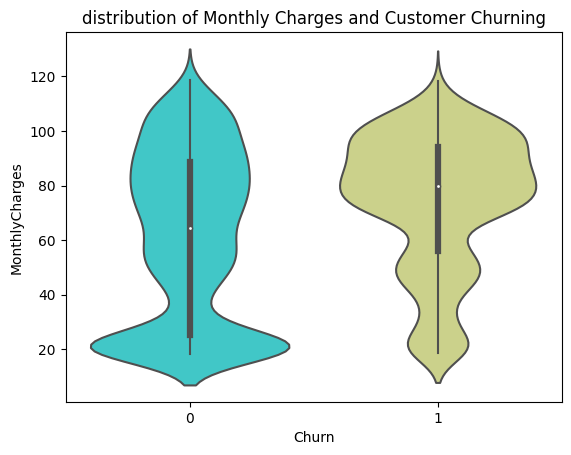

In [ ]:
sns.violinplot(x='Churn',y='MonthlyCharges', data=c_data, palette='rainbow').set(title = 'distribution of Monthly Charges and Customer Churning')


### Pairgrid

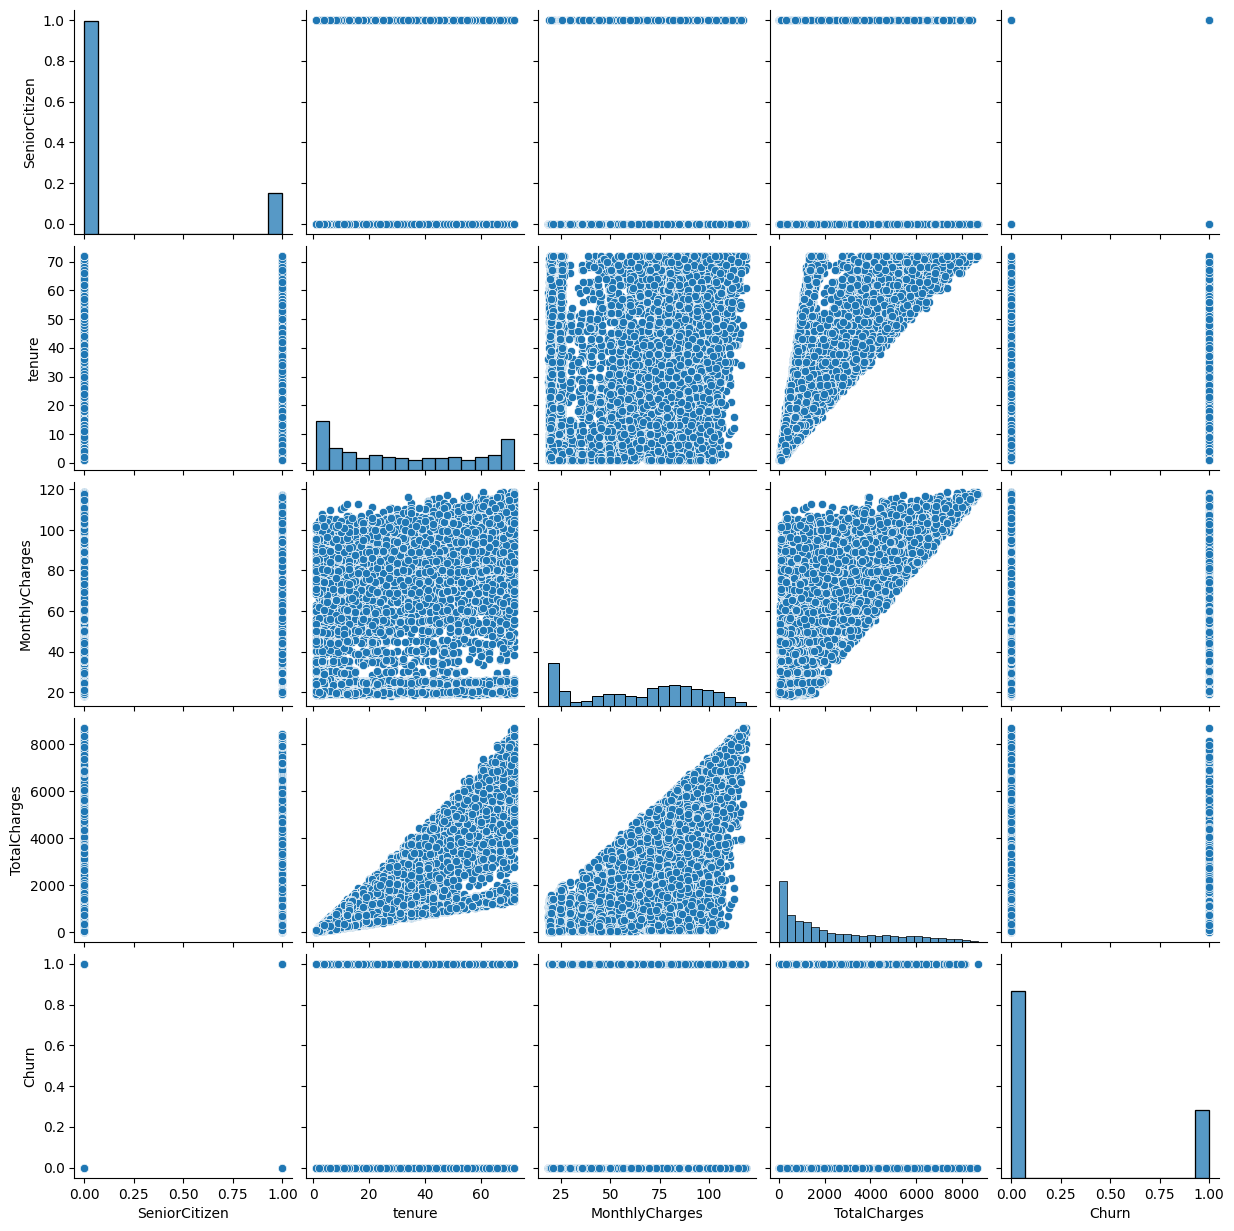

In [ ]:
pair_grid = sns.pairplot(c_data)

## Deep dive into relationship with Churn 

What is the relationship between Churn and all the services offerd by vodafone? 
 
The services offered by Vodafone include:
- PhoneService         
- MultipleLines        
- InternetService      
- OnlineSecurity       
- OnlineBackup         
- DeviceProtection     
- TechSupport          
- StreamingTV          
- StreamingMovies 

#### Relationship between Phone Service and Churn


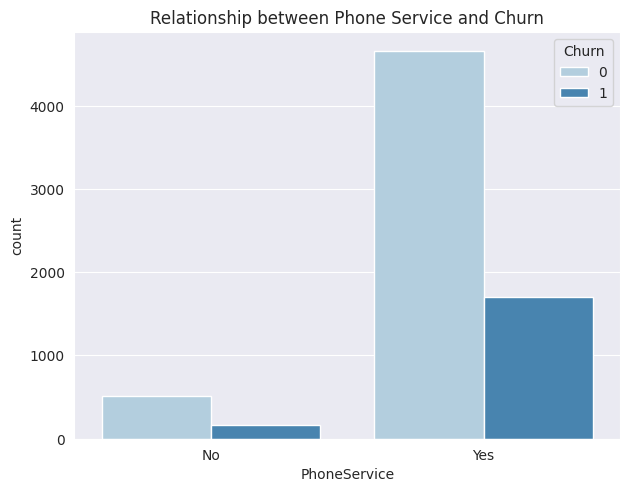

In [ ]:
sns.set_style('darkgrid')     
sns.countplot(x='PhoneService', hue='Churn', data=c_data, palette='Blues')
vc = c_data['PhoneService'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Phone Service and Churn')
plt.show()

- There are large number of customers who have Phone Servies compared with those who do not have phone services
- Of those with phone service, 1/3  do not churn while 2/3 churn


#### Relationship between Multiple Lines and Churn

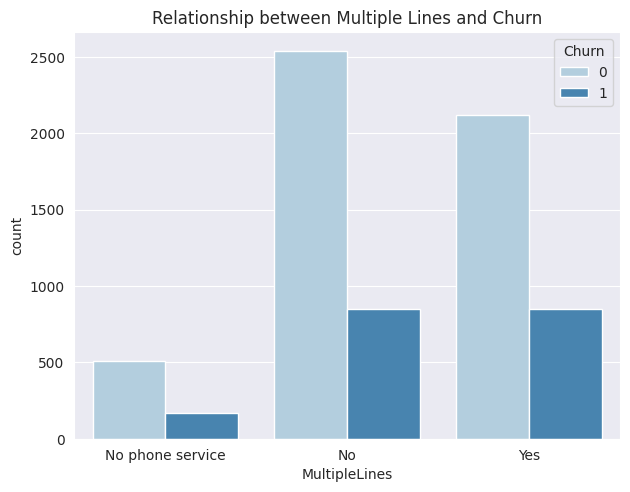

In [ ]:
sns.set_style('darkgrid')     
sns.countplot(x='MultipleLines', hue='Churn', data=c_data, palette='Blues')
vc = c_data['MultipleLines'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Multiple Lines and Churn')
plt.show()

- There are more customers without multiple lines compared with customers with multiple lines
- The difference between customers with single lines and those with multiple lines is not large.
- For customers without multiple lines, fewer of them churn about 1/3 of those who do not churn.
- For customers with multiple lines, those who churn are about 40%  of those who do not churn.

#### Relationship between Online Backup and Churn   


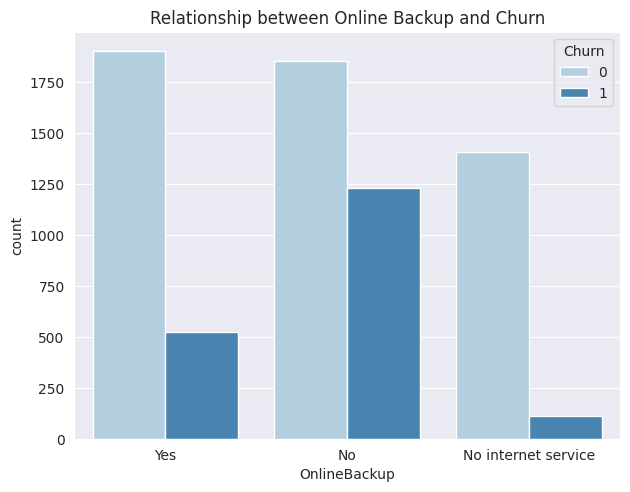

In [ ]:
sns.set_style('darkgrid')     
sns.countplot(x='OnlineBackup', hue='Churn', data=c_data, palette='Blues')
vc = c_data['OnlineBackup'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Online Backup and Churn')
plt.show()

#### Relationship between Online Security and Churn       


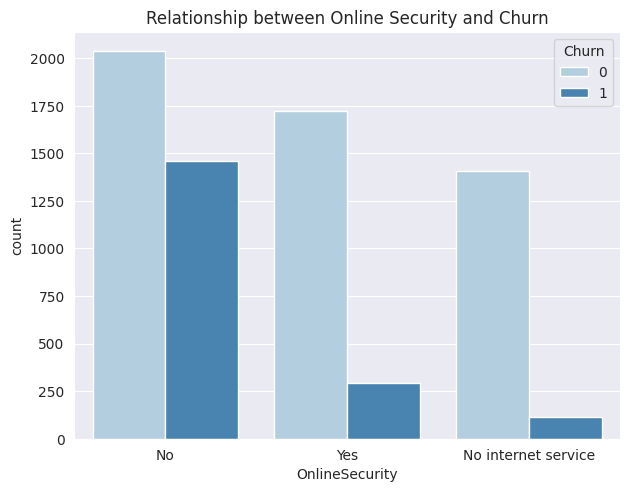

In [ ]:
sns.set_style('darkgrid')     
sns.countplot(x='OnlineSecurity', hue='Churn', data=c_data, palette='Blues')
vc = c_data['OnlineSecurity'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Online Security and Churn')
plt.show()

#### Relationship between Streaming Movies and Churn 

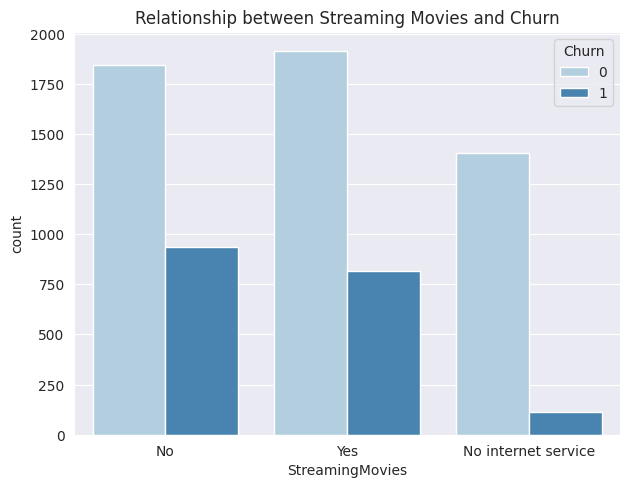

In [ ]:
sns.set_style('darkgrid')     
sns.countplot(x='StreamingMovies', hue='Churn', data=c_data, palette='Blues')
vc = c_data['StreamingMovies'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Streaming Movies and Churn')
plt.show()

#### Relationship between Streaming TV and Churn          

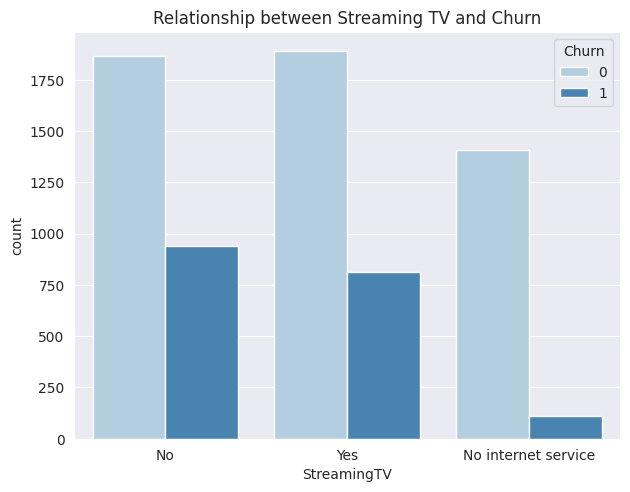

In [ ]:
sns.set_style('darkgrid')     
sns.countplot(x='StreamingTV', hue='Churn', data=c_data, palette='Blues')
vc = c_data['StreamingTV'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Streaming TV and Churn')
plt.show()

#### Relationship between Tech Support and Churn      

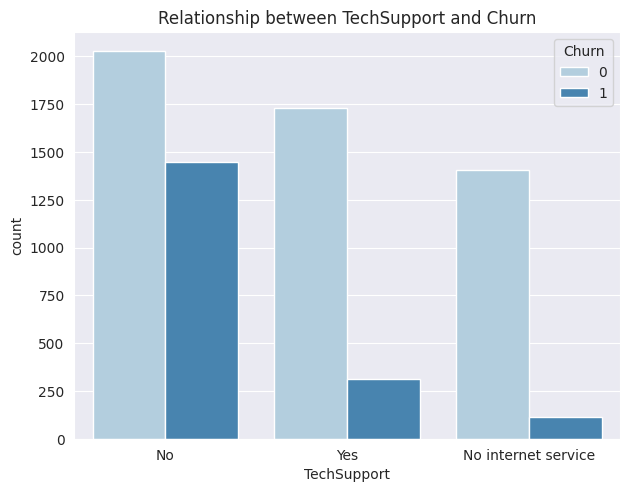

In [ ]:
sns.set_style('darkgrid')     
sns.countplot(x='TechSupport', hue='Churn', data=c_data, palette='Blues')
vc = c_data['TechSupport'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between TechSupport and Churn')
plt.show()

- A large number of customer do not have tech support. In this group, the difference between customer that churn and those that do not churn is 30% with those who churn on the lower end.
- For those with tech support, those who churn are 15% of those who do not churn.
- For customers wihtout internet service, 10% of customer who do not churn form the customers who churn.

#### Relationship between Device Protection and Churn     

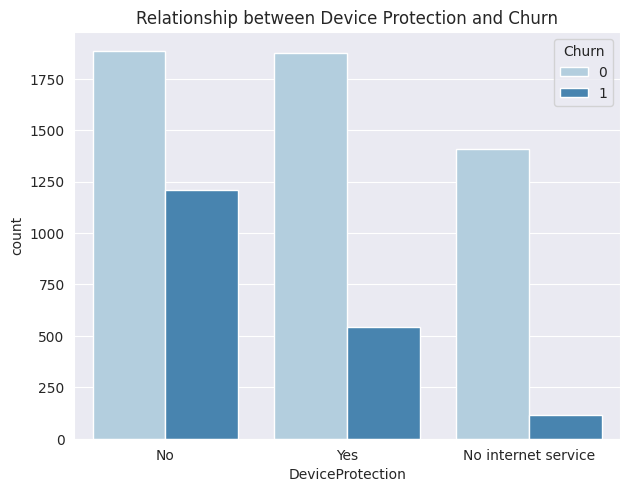

In [ ]:
sns.set_style('darkgrid')     
sns.countplot(x='DeviceProtection', hue='Churn', data=c_data, palette='Blues')
vc = c_data['DeviceProtection'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Device Protection and Churn')
plt.show()

#### Relationship between Senior Citizen and Churn

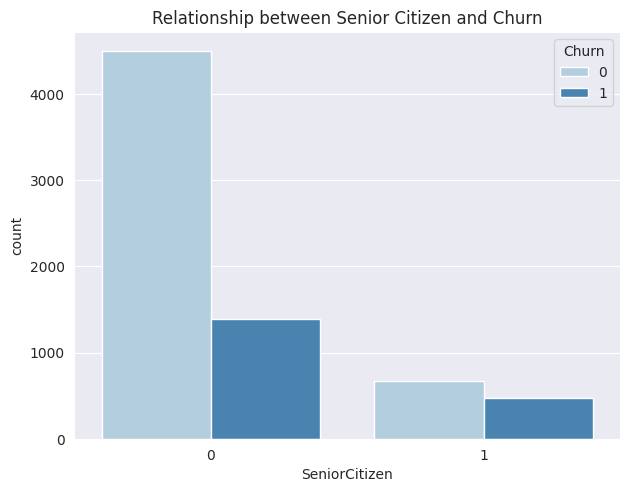

In [ ]:
sns.set_style('darkgrid')     
sns.countplot(x='SeniorCitizen', hue='Churn', data=c_data, palette='Blues')
vc = c_data['SeniorCitizen'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Senior Citizen and Churn')
plt.show()

-         


#### Relationship between Internet Service and Churn


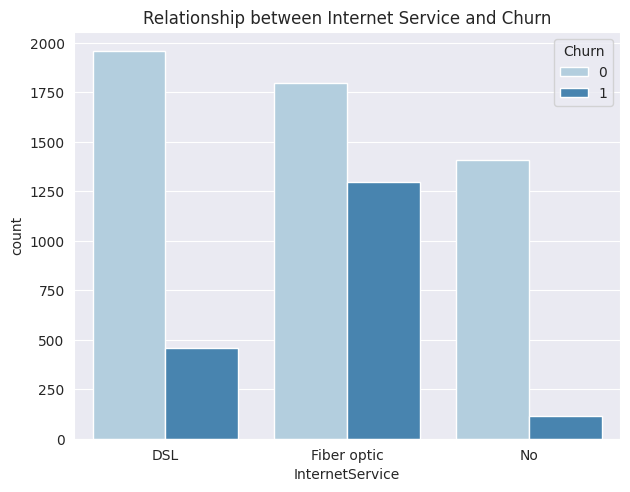

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='InternetService', hue='Churn', data=c_data, palette='Blues')
vc = c_data['InternetService'].value_counts()
for p in ax.patches:
    # Get the x and y coordinates of the bar
    x_coord = p.get_x() + p.get_width() / 2
    y_coord = p.get_height()
    
    # Format the text you want to display as the annotation
    count = int(y_coord)  # Convert the count to an integer if needed
    text = f'{count}'  # Customize the text as desired
    
    # Add the annotation to the plot
    ax.text(x=x_coord, y=y_coord/2, s=text, ha='center', va='bottom')
plt.tight_layout()
plt.title('Relationship between Internet Service and Churn')
plt.show()


## Encoding of Categorical Columns

In [ ]:
c_data['Churn'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9 KB


In [ ]:
ohe = OneHotEncoder(drop="first", sparse=False, handle_unknown='ignore')
c_data['gender'] = ohe.fit_transform(c_data['gender'].to_numpy().reshape(-1, 1))
c_data['Partner'] = ohe.fit_transform(c_data['Partner'].to_numpy().reshape(-1, 1))
c_data['Dependents'] = ohe.fit_transform(c_data['Dependents'].to_numpy().reshape(-1, 1))
c_data['PhoneService'] = ohe.fit_transform(c_data['PhoneService'].to_numpy().reshape(-1, 1))
c_data['MultipleLines'] = ohe.fit_transform(c_data['MultipleLines'].to_numpy().reshape(-1, 1))
c_data['InternetService'] = ohe.fit_transform(c_data['InternetService'].to_numpy().reshape(-1, 1))
c_data['OnlineSecurity'] = ohe.fit_transform(c_data['OnlineSecurity'].to_numpy().reshape(-1, 1))
c_data['OnlineBackup'] = ohe.fit_transform(c_data['OnlineBackup'].to_numpy().reshape(-1, 1))
c_data['DeviceProtection'] = ohe.fit_transform(c_data['DeviceProtection'].to_numpy().reshape(-1, 1))
c_data['TechSupport'] = ohe.fit_transform(c_data['TechSupport'].to_numpy().reshape(-1, 1))
c_data['StreamingTV'] = ohe.fit_transform(c_data['StreamingTV'].to_numpy().reshape(-1, 1))
c_data['StreamingMovies'] = ohe.fit_transform(c_data['StreamingMovies'].to_numpy().reshape(-1, 1))
c_data['Contract'] = ohe.fit_transform(c_data['Contract'].to_numpy().reshape(-1, 1))
c_data['PaperlessBilling'] = ohe.fit_transform(c_data['PaperlessBilling'].to_numpy().reshape(-1, 1))
c_data['PaymentMethod'] = ohe.fit_transform(c_data['PaymentMethod'].to_numpy().reshape(-1, 1))



In [ ]:
#c_data.drop('customerID', axis=1, inplace=True)
# save to csv

## Important Note

In [ ]:
#For machine learning use bagging and boosting, these do not need dealing with imbalance data. 
#Ensemble methods: Ensemble methods, such as bagging or boosting, can be effective in handling imbalanced datasets. 
#Techniques like Random Forests or Gradient Boosting can better handle class imbalance by combining multiple weak models.


#For other machine learning deal with imbalance data by using SMOTE (Synthetic Minority Over-sampling Technique), or ADASYN (Adaptive Synthetic Sampling).
#

In [ ]:
y= c_data['Churn']                         # Target Variable
X = c_data.drop('Churn', axis =1)          # Independent Variable

In [ ]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype
--------------  -----
7032 non-null   int64
dtypes: int64(1)
memory usage: 109.9 KB


In [ ]:
scaler = StandardScaler()
cs = scaler.fit_transform(X)
csn = pd.DataFrame(cs, columns = X.columns)
csn.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,3.056334,-0.886896,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,-0.514537,0.828939,-0.525351,-1.161694,-0.994194
1,0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,-0.327189,-0.886896,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,1.943495,-1.206361,-0.525351,-0.260878,-0.173740
2,0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.327189,-0.886896,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,-0.514537,0.828939,-0.525351,-0.363923,-0.959649
3,0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,3.056334,-0.886896,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,1.943495,-1.206361,-0.525351,-0.747850,-0.195248
4,-1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,-0.327189,1.127527,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,-0.52513,-0.514537,0.828939,-0.525351,0.196178,-0.940457


In [ ]:
def plot_metric(confusion, name):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
    confusion.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
    confusion.flatten()/np.sum(confusion)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    ax = sns.heatmap(confusion, annot=labels, fmt='', cmap='viridis')
    ax.set_title(f'{name}\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    ## Display the visualization of the Confusion Matrix.
    plt.show()

## Machine Models With Resampling

In [ ]:
X_resampled,y_resampled = ADASYN().fit_resample(X,y)
X_resampled.shape,y_resampled.shape

((10402, 19), (10402,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_resampled)))

Original dataset shape Counter({0: 5163, 1: 1869})
Resampled dataset shape Counter({1: 5239, 0: 5163})


In [ ]:
X_s = X_resampled
y_s = y_resampled

In [ ]:
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X_s, y_s, random_state=0)

# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of training set: {}\n size of validation set: {}\n size of test set:" " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))


Size of training set: 5850
 size of validation set: 1951
 size of test set: 2601



### Logistic Regression

train set score: 73.15
test set score: 71.66

Accuracy Score: 71.66%

Precision Score: 71.17%

Recall Score: 73.14%

F1 Score: 72.14%

AUC score is: 79.48 %



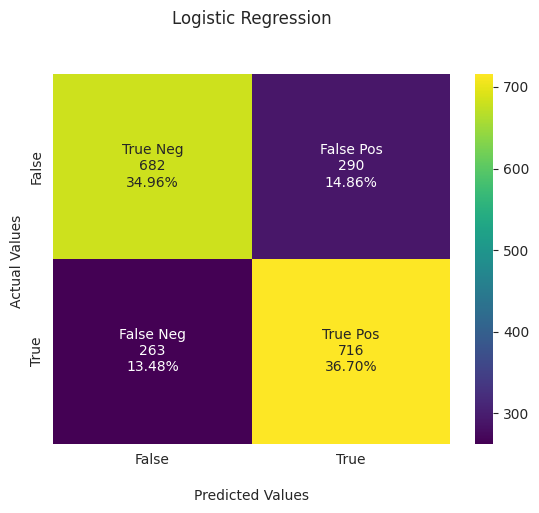

In [ ]:
LPlr = LogisticRegression(random_state=1)

# Fit 'LPknn' to the training set
LPlr.fit(X_train, y_train)

# Predict Output
ly_predict = LPlr.predict(X_valid)
pred_LPlr = LPlr.predict_proba(X_valid)[:,1]

#Train and Test Scores
LPlr_Tr_Score = round(LPlr.score(X_train, y_train)*100, 2)
LPlr_Tt_Score = round(LPlr.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPlr_Tr_Score))
print('test set score: {:.2f}'.format(LPlr_Tt_Score))


print()
LPlr_sc = round(accuracy_score(y_valid, ly_predict)*100, 2)
print("Accuracy Score: {}%".format(LPlr_sc))
print()
PS_lr = round(precision_score(y_valid, ly_predict)*100, 2)
print("Precision Score: {}%".format(PS_lr))
print()
RS_lr = round(recall_score(y_valid, ly_predict)*100, 2)
print("Recall Score: {}%".format(RS_lr))
print()
FS_lr = round(f1_score(y_valid, ly_predict)*100, 2)
print("F1 Score: {}%".format(FS_lr))
print()
fpr1, tpr1, threshold = roc_curve(y_valid, pred_LPlr)
roc_auc = metrics.auc(fpr1, tpr1)
LPlrA = round(metrics.auc(fpr1, tpr1)*100, 2)
print(f'AUC score is:', LPlrA,'%')
print()
confusion = confusion_matrix(y_valid, ly_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Logistic Regression")

#### **Confusion Matrix**
- **Logistic Regression Classifier** classified about **35%**, correctly  **[True Negative]**, which is the correct prediction of customers who did not churn and failed to classify about **15%**, correctly **[False Positive]**, which is the incorrect prediction of customers who did not churn.

- **Logistic Regression Classifier** classified about **37%**, correctly  **[True Positive]**, which is the correct prediction of customers who churn and failed to classify about **14%**, correctly **[False Negative]**, which is the incorrect prediction of customeers who did churn.

### RandomForest

train set score: 99.88
test set score: 83.44

Accuracy Score: 83.44%

Precision Score: 83.47%

Recall Score: 83.55%

F1 Score: 83.51%

AUC score is: 91.4 %



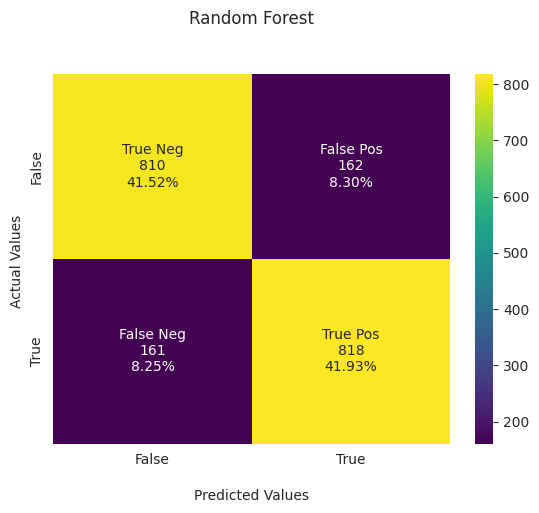

In [ ]:
crf = RandomForestClassifier(random_state=1)
# Fit 'LPknn' to the training set
crf.fit(X_train, y_train)

# Predict Output
crf_predict = crf.predict(X_valid)
pred_crf = crf.predict_proba(X_valid)[:,1]

#Train and Test Scores
crf_Tr_Score = round(crf.score(X_train, y_train)*100, 2)
crf_Tt_Score = round(crf.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(crf_Tr_Score))
print('test set score: {:.2f}'.format(crf_Tt_Score))



print()
crf_sc = round(accuracy_score(y_valid, crf_predict)*100, 2)
print("Accuracy Score: {}%".format(crf_sc))
print()
PS_crf = round(precision_score(y_valid, crf_predict)*100, 2)
print("Precision Score: {}%".format(PS_crf))
print()
RS_crf = round(recall_score(y_valid, crf_predict)*100, 2)
print("Recall Score: {}%".format(RS_crf))
print()
FS_crf = round(f1_score(y_valid, crf_predict)*100, 2)
print("F1 Score: {}%".format(FS_crf))
print()
fpr2, tpr2, threshold = roc_curve(y_valid, pred_crf)
roc_auc = metrics.auc(fpr2, tpr2)
crfA = round(metrics.auc(fpr2, tpr2)*100, 2)
print(f'AUC score is:', crfA,'%')
print()
confusion = confusion_matrix(y_valid, crf_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Random Forest")

#### **Confusion Matrix**
- **Random Forest Classifier** classified about **42%**, correctly  **[True Negative]**, which is the correct prediction of customers who did not churn and failed to classify about **8.3%**, correctly **[False Positive]**, which is the incorrect prediction of customers who did not churn.

- **Random Forest Classifier** classified about **4%**, correctly  **[True Positive]**, which is the correct prediction of customers who churn and failed to classify about **8.3%**, correctly **[False Negative]**, which is the incorrect prediction of customeers who did churn.

### Support Vector Machine


train set score: 94.96
test set score: 75.96

Accuracy Score: 75.96%

Precision Score: 78.15%

Recall Score: 72.32%

F1 Score: 75.12%

AUC score is: 80.39 %



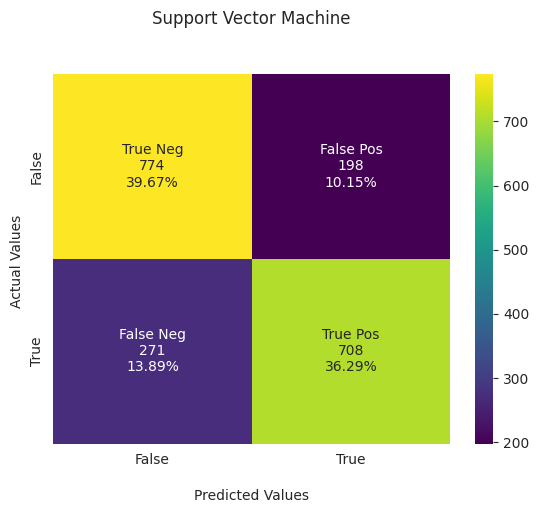

In [ ]:
csvc = SVC(gamma='auto', probability=True, random_state=1)
# Fit 'LPknn' to the training set
csvc.fit(X_train, y_train)

# Predict Output
csvc_predict = csvc.predict(X_valid)
pred_csvc = csvc.predict_proba(X_valid)[:,1]
#pred_crf = crf.predict_proba(X_valid)[:,1]

#Train and Test Scores
csvc_Tr_Score = round(csvc.score(X_train, y_train)*100, 2)
csvc_Tt_Score = round(csvc.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(csvc_Tr_Score))
print('test set score: {:.2f}'.format(csvc_Tt_Score))



print()
csvc_sc = round(accuracy_score(y_valid, csvc_predict)*100, 2)
print("Accuracy Score: {}%".format(csvc_sc))
print()
PS_csvc = round(precision_score(y_valid, csvc_predict)*100, 2)
print("Precision Score: {}%".format(PS_csvc))
print()
RS_csvc = round(recall_score(y_valid, csvc_predict)*100, 2)
print("Recall Score: {}%".format(RS_csvc))
print()
FS_csvc = round(f1_score(y_valid, csvc_predict)*100, 2)
print("F1 Score: {}%".format(FS_csvc))
print()
fpr3, tpr3, threshold = roc_curve(y_valid, pred_csvc)
roc_auc = metrics.auc(fpr3, tpr3)
csvcA = round(metrics.auc(fpr3, tpr3)*100, 2)
print(f'AUC score is:', csvcA,'%')
print()
confusion = confusion_matrix(y_valid, csvc_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Support Vector Machine")

#### **Confusion Matrix**
- **Support Vector Machine Classifier** classified about **40%**, correctly  **[True Negative]**, which is the correct prediction of customers who did not churn and failed to classify about **10%**, correctly **[False Positive]**, which is the incorrect prediction of customers who did not churn.

- **Support Vector Machine Classifier** classified about **36%**, correctly  **[True Positive]**, which is the correct prediction of customers who churn and failed to classify about **14%**, correctly **[False Negative]**, which is the incorrect prediction of customeers who did churn.

### K- Nearest Neighbors

train set score: 79.50
test set score: 72.12

Accuracy Score: 72.12%

Precision Score: 69.3%

Recall Score: 79.78%

F1 Score: 74.17%

AUC score is: 78.29 %



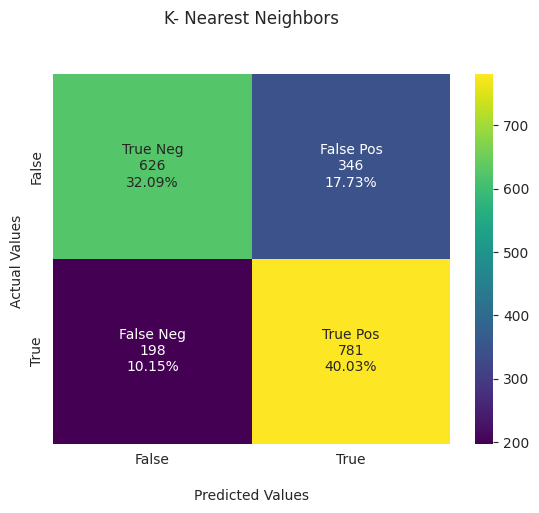

In [ ]:
cknn = KNeighborsClassifier(n_neighbors=7)

# Fit 'LPknn' to the training set
cknn.fit(X_train, y_train)

# Predict Output
cknn_predict = cknn.predict(X_valid)
pred_cknn = cknn.predict_proba(X_valid)[:,1]

#Train and Test Scores
cknn_Tr_Score = round(cknn.score(X_train, y_train)*100, 2)
cknn_Tt_Score = round(cknn.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(cknn_Tr_Score))
print('test set score: {:.2f}'.format(cknn_Tt_Score))



print()
cknn_sc = round(accuracy_score(y_valid, cknn_predict)*100, 2)
print("Accuracy Score: {}%".format(cknn_sc))
print()
PS_cknn = round(precision_score(y_valid, cknn_predict)*100, 2)
print("Precision Score: {}%".format(PS_cknn))
print()
RS_cknn = round(recall_score(y_valid, cknn_predict)*100, 2)
print("Recall Score: {}%".format(RS_cknn))
print()
FS_cknn = round(f1_score(y_valid, cknn_predict)*100, 2)
print("F1 Score: {}%".format(FS_cknn))
print()
fpr4, tpr4, threshold = roc_curve(y_valid, pred_cknn)
roc_auc = metrics.auc(fpr4, tpr4)
cknnA = round(metrics.auc(fpr4, tpr4)*100, 2)
print(f'AUC score is:', cknnA,'%')
print()
confusion = confusion_matrix(y_valid, cknn_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "K- Nearest Neighbors")

#### **Confusion Matrix**
- **K- Nearest Neighbors Classifier** classified about **32%**, correctly  **[True Negative]**, which is the correct prediction of customers who did not churn and failed to classify about **18%**, correctly **[False Positive]**, which is the incorrect prediction of customers who did not churn.

- **K- Nearest Neighbors Classifier** classified about **40%**, correctly  **[True Positive]**, which is the correct prediction of customers who churn and failed to classify about **10%**, correctly **[False Negative]**, which is the incorrect prediction of customeers who did churn.

### Extra Trees Classifier

train set score: 99.88
test set score: 82.83

Accuracy Score: 82.83%

Precision Score: 82.79%

Recall Score: 83.04%

F1 Score: 82.92%

AUC score is: 90.32 %



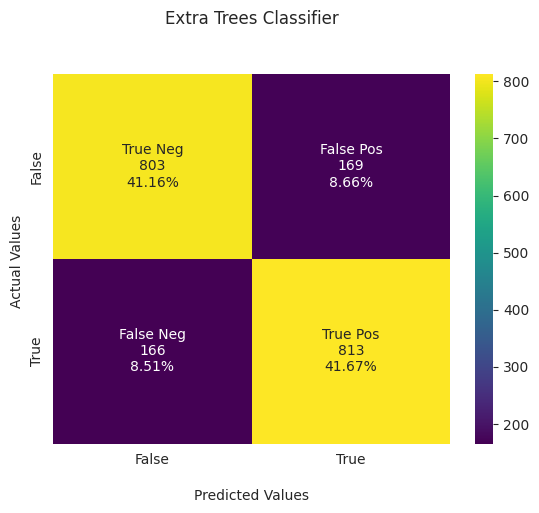

In [ ]:
crc = ExtraTreesClassifier(random_state=1)

# Fit 'LPknn' to the training set
crc.fit(X_train, y_train)

# Predict Output
crc_predict = crc.predict(X_valid)
pred_crc = crc.predict_proba(X_valid)[:,1]

#Train and Test Scores
crc_Tr_Score = round(crc.score(X_train, y_train)*100, 2)
crc_Tt_Score = round(crc.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(crc_Tr_Score))
print('test set score: {:.2f}'.format(crc_Tt_Score))



print()
crc_sc = round(accuracy_score(y_valid, crc_predict)*100, 2)
print("Accuracy Score: {}%".format(crc_sc))
print()
PS_crc = round(precision_score(y_valid, crc_predict)*100, 2)
print("Precision Score: {}%".format(PS_crc))
print()
RS_crc = round(recall_score(y_valid, crc_predict)*100, 2)
print("Recall Score: {}%".format(RS_crc))
print()
FS_crc = round(f1_score(y_valid, crc_predict)*100, 2)
print("F1 Score: {}%".format(FS_crc))
print()
fpr5, tpr5, threshold = roc_curve(y_valid, pred_crc)
roc_auc = metrics.auc(fpr5, tpr5)
crcA = round(metrics.auc(fpr5, tpr5)*100, 2)
print(f'AUC score is:', crcA,'%')
print()
confusion = confusion_matrix(y_valid, crc_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Extra Trees Classifier")

#### **Confusion Matrix**
- **Extra Trees Classifier** classified about **41%**, correctly  **[True Negative]**, which is the correct prediction of customers who did not churn and failed to classify about **9%**, correctly **[False Positive]**, which is the incorrect prediction of customers who did not churn.

- **Extra Trees Classifier** classified about **41%**, correctly  **[True Positive]**, which is the correct prediction of customers who churn and failed to classify about **9%**, correctly **[False Negative]**, which is the incorrect prediction of customeers who did churn.

### Histogram-based Gradient Boosting Classification Tree 



train set score: 91.01
test set score: 83.70

Accuracy Score: 83.7%

Precision Score: 82.82%

Recall Score: 85.19%

F1 Score: 83.99%

AUC score is: 92.49 %




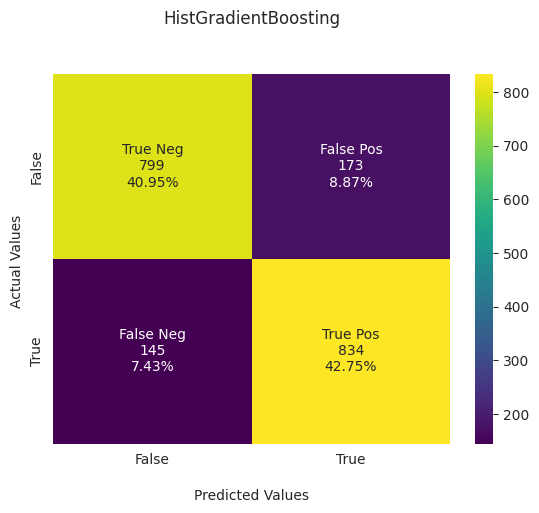

In [ ]:
LPdt = HistGradientBoostingClassifier(random_state=1) 

#Fit 'LPdt' to the training set
LPdt.fit(X_train, y_train)

# Predict Output
dy_predict = LPdt.predict(X_valid)
pred_LPdt = LPdt.predict_proba(X_valid)[:,1]

#Train and Test Scores
LPdt_Tr_Score = round(LPdt.score(X_train, y_train)*100, 2)
LPdt_Tt_Score = round(LPdt.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPdt_Tr_Score))
print('test set score: {:.2f}'.format(LPdt_Tt_Score))


print()
LPdt_sc = round(accuracy_score(y_valid, dy_predict)*100, 2)
print("Accuracy Score: {}%".format(LPdt_sc))
print()
PS_dt = round(precision_score(y_valid, dy_predict)*100, 2)
print("Precision Score: {}%".format(PS_dt))
print()
RS_dt = round(recall_score(y_valid, dy_predict)*100, 2)
print("Recall Score: {}%".format(RS_dt))
print()
FS_dt = round(f1_score(y_valid, dy_predict)*100, 2)
print("F1 Score: {}%".format(FS_dt))
print()
fpr6, tpr6, threshold = roc_curve(y_valid, pred_LPdt)
roc_auc = metrics.auc(fpr6, tpr6)
LPhgbA = round(metrics.auc(fpr6, tpr6)*100, 2)
print(f'AUC score is:', LPhgbA,'%')
print()
confusion = confusion_matrix(y_valid, dy_predict)
#print("Confusion matrix:\n{}".format(confusion))
print()
plot_metric(confusion, "HistGradientBoosting")

#### **Confusion Matrix**
- **Histogram-based Gradient Boosting Classifier** classified about **41%**, correctly  **[True Negative]**, which is the correct prediction of customers who did not churn and failed to classify about **9%**, correctly **[False Positive]**, which is the incorrect prediction of customers who did not churn.

- **Histogram-based Gradient Boosting Classifier** classified about **43%**, correctly  **[True Positive]**, which is the correct prediction of customers who churn and failed to classify about **7%**, correctly **[False Negative]**, which is the incorrect prediction of customeers who did churn.

### AdaBoostClassifier

train set score: 84.89
test set score: 83.55

Accuracy Score: 83.55%

Precision Score: 82.97%

Recall Score: 84.58%

F1 Score: 83.76%

AUC score is: 91.94 %




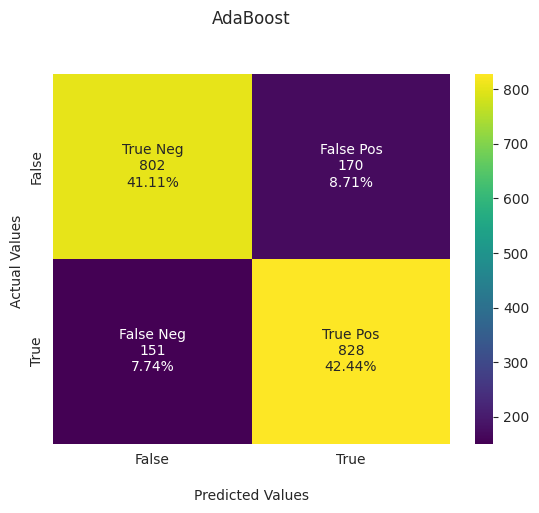

In [ ]:
LPrf = AdaBoostClassifier(random_state=1)

#Fit 'LPrf' to the training set
LPrf.fit(X_train, y_train)

# Predict Output
ry_predict = LPrf.predict(X_valid)
pred_LPrf = LPrf.predict_proba(X_valid)[:,1]

#Train and Test Scores
LPrf_Tr_Score = round(LPrf.score(X_train, y_train)*100, 2)
LPrf_Tt_Score = round(LPrf.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPrf_Tr_Score))
print('test set score: {:.2f}'.format(LPrf_Tt_Score))


print()
LPrf_sc = round(accuracy_score(y_valid, ry_predict)*100, 2)
print("Accuracy Score: {}%".format(LPrf_sc))
print()
PS_rf = round(precision_score(y_valid, ry_predict)*100, 2)
print("Precision Score: {}%".format(PS_rf))
print()
RS_rf = round(recall_score(y_valid, ry_predict)*100, 2)
print("Recall Score: {}%".format(RS_rf))
print()
FS_rf = round(f1_score(y_valid, ry_predict)*100, 2)
print("F1 Score: {}%".format(FS_rf))
print()
fpr7, tpr7, threshold = roc_curve(y_valid, pred_LPrf)
roc_auc = metrics.auc(fpr7, tpr7)
LPabtA = round(metrics.auc(fpr7, tpr7)*100, 2)
print(f'AUC score is:', LPabtA,'%')
print()
confusion = confusion_matrix(y_valid, ry_predict)
#print("Confusion matrix:\n{}".format(confusion))
print()
plot_metric(confusion, "AdaBoost")

#### **Confusion Matrix**
- **AdaBoost Classifier** classified about **41%**, correctly  **[True Negative]**, which is the correct prediction of customers who did not churn and failed to classify about **9%**, correctly **[False Positive]**, which is the incorrect prediction of customers who did not churn.

- **AdaBoost Classifier** classified about **42%**, correctly  **[True Positive]**, which is the correct prediction of customers who churn and failed to classify about **8%**, correctly **[False Negative]**, which is the incorrect prediction of customeers who did churn.

### GradientBoostingClassifier


train set score: 84.89
test set score: 83.75

Accuracy Score: 83.75%

Precision Score: 82.32%

Recall Score: 86.11%

F1 Score: 84.17%

AUC score is: 92.69 %



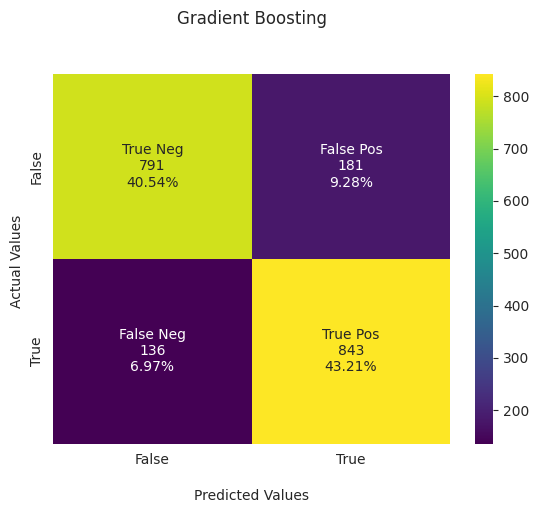

In [ ]:
LPgbm = GradientBoostingClassifier(random_state=1)

#Fit 'LPsvm' to the training set
LPgbm.fit(X_train, y_train)

# Predict Output
gy_predict = LPgbm.predict(X_valid)
pred_LPgbm = LPgbm.predict_proba(X_valid)[:,1]


#Train and Test Scores
LPgbm_Tr_Score = round(LPgbm.score(X_train, y_train)*100, 2)
LPgbm_Tt_Score = round(LPgbm.score(X_valid, y_valid)*100, 2)
print('train set score: {:.2f}'.format(LPrf_Tr_Score))
print('test set score: {:.2f}'.format(LPgbm_Tt_Score))


print()
LPgbm_sc = round(accuracy_score(y_valid, gy_predict)*100, 2)
print("Accuracy Score: {}%".format(LPgbm_sc))
print()
PS_gbm = round(precision_score(y_valid, gy_predict)*100, 2)
print("Precision Score: {}%".format(PS_gbm))
print()
RS_gbm = round(recall_score(y_valid, gy_predict)*100, 2)
print("Recall Score: {}%".format(RS_gbm))
print()
FS_gbm = round(f1_score(y_valid, gy_predict)*100, 2)
print("F1 Score: {}%".format(FS_gbm))
print()
fpr8, tpr8, threshold = roc_curve(y_valid, pred_LPgbm)
roc_auc = metrics.auc(fpr8, tpr8)
LPgbmA = round(metrics.auc(fpr8, tpr8)*100, 2)
print(f'AUC score is:', LPgbmA,'%')
print()
confusion = confusion_matrix(y_valid, gy_predict)
#print("Confusion matrix:\n{}".format(confusion))
plot_metric(confusion, "Gradient Boosting")

#### **Confusion Matrix**
- **Gradient Boosting Classifier** classified about **41%**, correctly  **[True Negative]**, which is the correct prediction of customers who did not churn and failed to classify about **9%**, correctly **[False Positive]**, which is the incorrect prediction of customers who did not churn.

- **Gradient Boosting Classifier** classified about **43%**, correctly  **[True Positive]**, which is the correct prediction of customers who churn and failed to classify about **7%**, correctly **[False Negative]**, which is the incorrect prediction of customeers who did churn.


## Find the best Model

### Evaluation Metric Summary

In [ ]:
LPMetric = pd.DataFrame({'Models': ["Logistic Regression",
                                    "RandomForest",
                                    "Support Vector Machine",
                                    "K- Nearest Neighbors",
                                    "Extra Trees Classifier",  
                                    "HistGradientBoosting",
                                    "AdaBoost",
                                    "Gradient Boosting"],
                             'Accuracy Score': [LPlr_sc, crf_sc, csvc_sc, cknn_sc, crc_sc, LPdt_sc, LPrf_sc, LPgbm_sc],
                             'Precision Score': [PS_lr, PS_crf, PS_csvc, PS_cknn, PS_crc, PS_dt, PS_rf, PS_gbm],
                             'Recall Score': [RS_lr, RS_crf, RS_csvc, RS_cknn, RS_crc, RS_dt, RS_rf, RS_gbm],
                             'F1 Score': [FS_lr, FS_crf, FS_csvc, FS_cknn, FS_crc, FS_dt, FS_rf, FS_gbm]})


LPMetrics = LPMetric.sort_values(by = 'F1 Score',ascending = False)
LPMetrics = LPMetrics.set_index('Models')
LPMetrics

,Accuracy Score,Precision Score,Recall Score,F1 Score
Models,,,,
Gradient Boosting,83.75,82.32,86.11,84.17
HistGradientBoosting,83.70,82.82,85.19,83.99
AdaBoost,83.55,82.97,84.58,83.76
RandomForest,83.44,83.47,83.55,83.51
Extra Trees Classifier,82.83,82.79,83.04,82.92
Support Vector Machine,75.96,78.15,72.32,75.12
K- Nearest Neighbors,72.12,69.30,79.78,74.17
Logistic Regression,71.66,71.17,73.14,72.14


- For Accuracy Score, Historygram based Gradient boosting is the best performer with a score of 84.04% while K-Nearest Neighbors is the worst performer with a score of 72.81%.
- Precision Score, Random Forest is the best performer with 84.19%  score while K-Nearest Neighbors performed worst with a score of 69.17%.
- Fro Recall Score, the best performer is Ada Boost with 85.89% score and Support Vector Machine was the worst performer with 73.44%.
- For f1 Score, Ramdom Forest performed the best with 83.79% score and K-Nearest Neighbors performed the worst with a score of 74.71%
- Due to the fact that our data is imbalance, the F1 score and Area Under the Receiver Operating Characteristic Curve (AUC-ROC) will be used to evalute the performance of the various models.
- Therefore, Ramdom Forest is the best model among the consider models

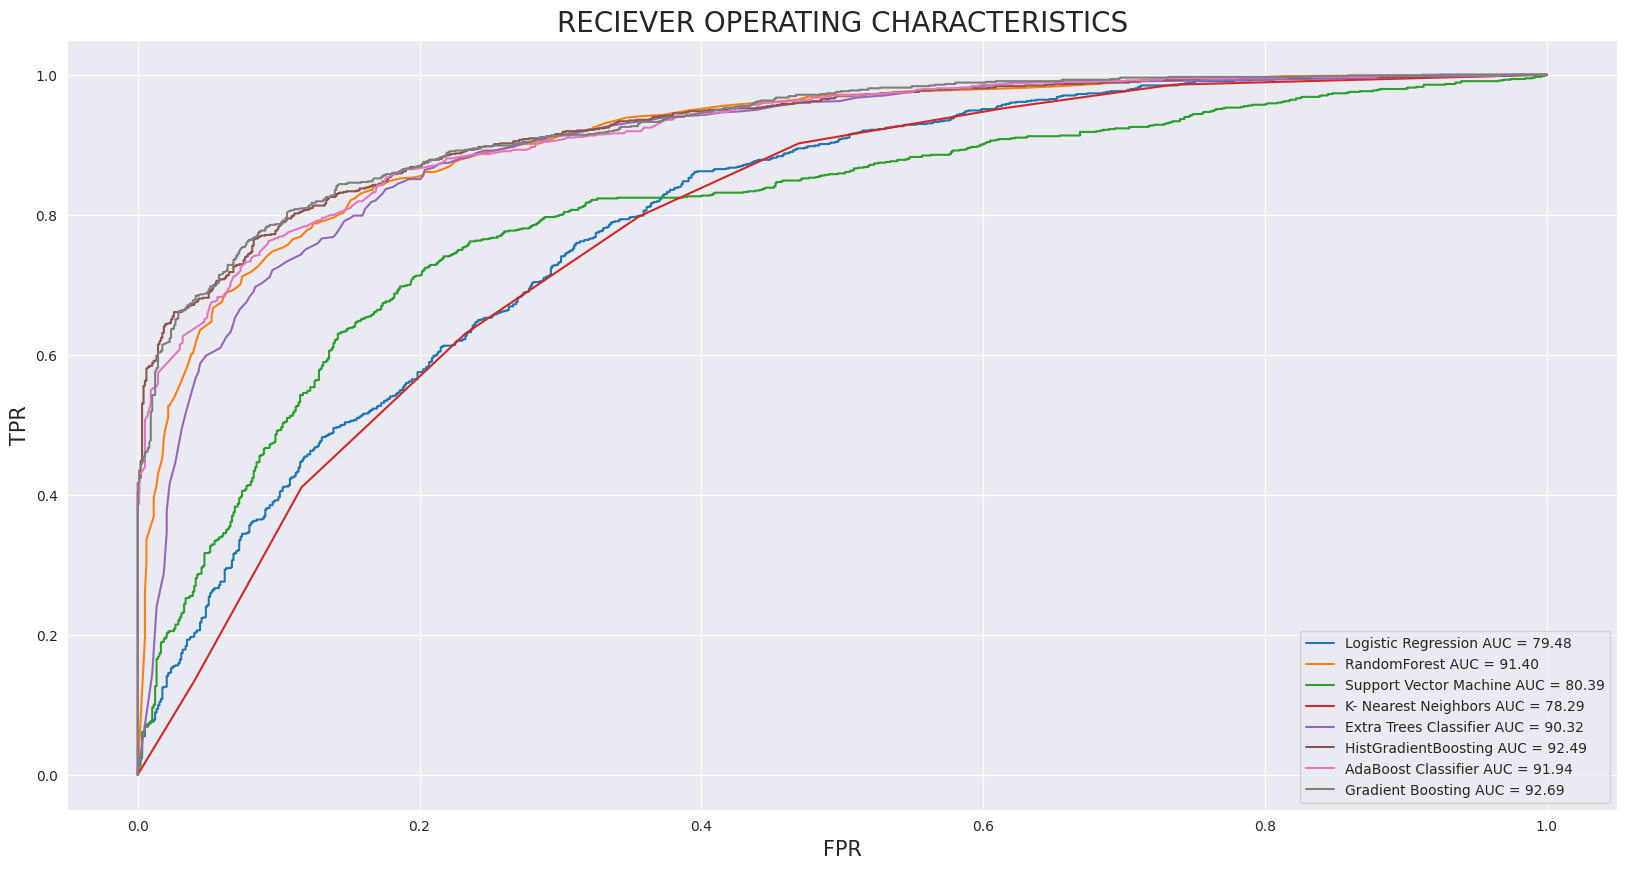

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(fpr1,tpr1, label = 'Logistic Regression ' 'AUC = %0.2f' %  LPlrA)
plt.plot(fpr2,tpr2, label = 'RandomForest ' 'AUC = %0.2f' % crfA)
plt.plot(fpr3,tpr3, label = 'Support Vector Machine ' 'AUC = %0.2f' % csvcA)
plt.plot(fpr4,tpr4, label = 'K- Nearest Neighbors ' 'AUC = %0.2f' % cknnA)
plt.plot(fpr5,tpr5, label = 'Extra Trees Classifier ' 'AUC = %0.2f' % crcA)
plt.plot(fpr6,tpr6, label ='HistGradientBoosting ' 'AUC = %0.2f' % LPhgbA)
plt.plot(fpr7,tpr7, label = 'AdaBoost Classifier ' 'AUC = %0.2f' % LPabtA)
plt.plot(fpr8,tpr8, label = 'Gradient Boosting ' 'AUC = %0.2f' % LPgbmA)
plt.legend(loc = 'best')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('RECIEVER OPERATING CHARACTERISTICS', fontsize = 20)
plt.show()

Historygram based Gradient boosting has the best score of 92.3% while K-Nearest Neighbor is the worst performaner with 79.20%.

**Feature Importance**

In [ ]:
importance = pd.DataFrame({'feature':X.columns,'importance':np.round(crf.feature_importances_,3)})
importance = importance.sort_values('importance',ascending=False).set_index('feature')
importance.head(30)

,importance
feature,
TotalCharges,0.191
tenure,0.166
MonthlyCharges,0.158
PaperlessBilling,0.085
InternetService,0.065
Partner,0.059
Dependents,0.059
Contract,0.053
gender,0.044


<Axes: ylabel='feature'>

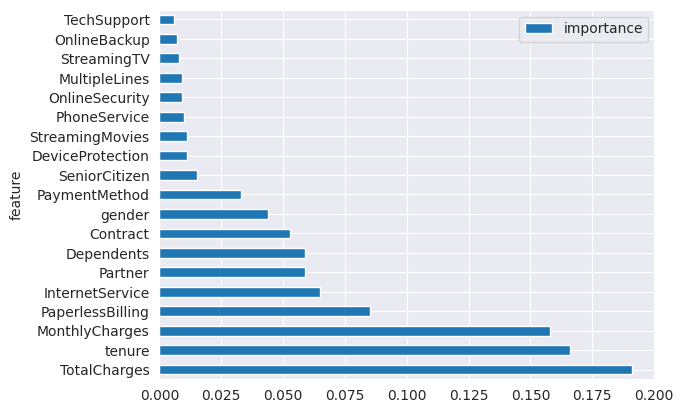

In [ ]:
importance.plot.barh()

The following features have feature importance less than 0.01 
- TechSupport
- OnlineBackup
- StreamingMovies	
- StreamingTV	
- DeviceProtection
- OnlineSecurity

These features will be dropped.


#### **Dropping insignificant features** 

In [ ]:
X.drop('DeviceProtection', axis = 1, inplace = True)
X.drop('OnlineSecurity', axis = 1, inplace = True)
X.drop('StreamingMovies', axis = 1, inplace = True)
X.drop('StreamingTV', axis = 1, inplace = True)
X.drop('TechSupport', axis = 1, inplace = True)
X.drop('OnlineBackup', axis = 1, inplace = True)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,29.85,29.85
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,1.0,0.0,0.0,56.95,1889.50
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,0.0,1.0,0.0,53.85,108.15
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,1.0,0.0,0.0,42.30,1840.75
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,1.0,0.0,70.70,151.65


### Hyperparameter Tuning

In [ ]:
#from sklearn.ensemble import 
model = RandomForestClassifier(random_state=1)


# define grid search
grid = {
    'n_estimators': [100, 200, 300],  # try different number of trees
    'max_depth': [None, 5, 10],       # try different maximum depth values
    'max_features': ['sqrt', 'log2'], # try different options for the number of features to consider
    'criterion': ['gini', 'entropy']  # try different quality measures
}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

# summarize results
print("Best Score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))



Best Score: 0.853239 using {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 300}


### Retraining and Remodeling

In [ ]:
LPdt = RandomForestClassifier(**grid_result.best_params_, random_state=1)

#Fit 'LPdt' to the training set
LPdt.fit(X_trainval, y_trainval)

# Predict Output
dy_predict = LPdt.predict(X_test)
pred_LPdt = LPdt.predict_proba(X_test)[:,1]

#Train and Test Scores
LPdt_Tr_Score = round(LPdt.score(X_trainval, y_trainval)*100, 2)
LPdt_Tt_Score = round(LPdt.score(X_test, y_test)*100, 2)
print('train set score: {:.2f}'.format(LPdt_Tr_Score))
print('test set score: {:.2f}'.format(LPdt_Tt_Score))



train set score: 88.09
test set score: 85.77


#### Evalutaion Metrics of Retrained Model

Accuracy Score: 85.77%

Precision Score: 84.4%

Recall Score: 88.24%

F1 Score: 86.28%

ROC AUC Score: 93.34%




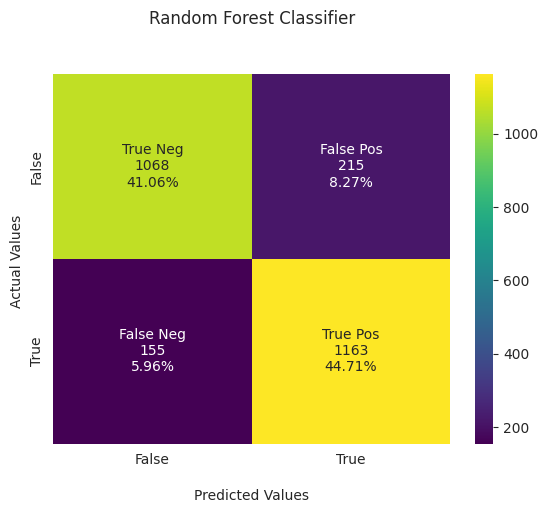

In [ ]:
LPdt_sc = round(accuracy_score(y_test, dy_predict)*100, 2)
print("Accuracy Score: {}%".format(LPdt_sc))
print()
PS_dt = round(precision_score(y_test, dy_predict)*100, 2)
print("Precision Score: {}%".format(PS_dt))
print()
RS_dt = round(recall_score(y_test, dy_predict)*100, 2)
print("Recall Score: {}%".format(RS_dt))
print()
FS_dt = round(f1_score(y_test, dy_predict)*100, 2)
print("F1 Score: {}%".format(FS_dt))
print()
RAS_dt = round(roc_auc_score(y_test, pred_LPdt)*100, 2)
print("ROC AUC Score: {}%".format(RAS_dt))
print()
confusion = confusion_matrix(y_test, dy_predict)
#print("Confusion matrix:\n{}".format(confusion))
print()
plot_metric(confusion, "Random Forest Classifier")

### **Confusion Matrix**
- **Random Forest Classifier** classified **827** about **42%**, correctly  **[True Negative]**, which is the correct prediction of customers who did not churn and failed to classify **158** about **8%**, correctly **[False Positive]**, which is the incorrect prediction of customers who did not churn.

- **Random Forest Classifier** classified **801** about **41%**, correctly  **[True Positive]**, which is the correct prediction of customers who churn and failed to classify **163** about **8%**, correctly **[False Negative]**, which is the incorrect prediction of customeers who did churn.

ROC-AUC-Score: 93.34 %


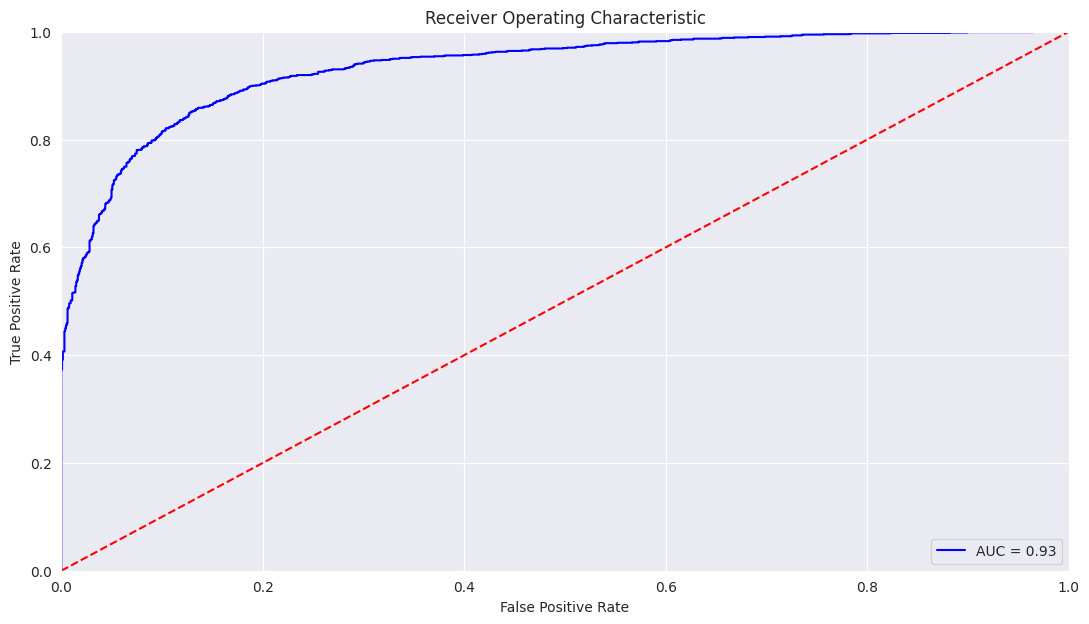

In [ ]:
pred_LPdt = LPdt.predict_proba(X_test)[:,1]


fpr, tpr, threshold = roc_curve(y_test, pred_LPdt)
roc_auc = metrics.auc(fpr, tpr)


r_a_score = round(roc_auc_score(y_test, pred_LPdt)*100, 2)
print("ROC-AUC-Score:", r_a_score,'%')

import matplotlib.pyplot as plt
plt.figure(figsize = (13,7))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()